# Capitulo 2 : Distribuciones de Datos y Muestras

## Carga de los datos

In [2]:
# importamos librerias
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

Definimos rutas a los conjuntos de datos. Si no mantienes los datos en el mismo directorio que el codigo, adapte los nombres de las rutas

In [4]:
LOANS_INCOME_CSV = DATA / 'loans_income.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'

## Distribucion Muestral del Estadistico

Los datos que vamos a utilizar refieren a los ingresos anuales de los solicitantes de prestamos de un Club. Vamos a probar que la distribucion muestral de un estadistico como la Media adopta la forma de campana y que a mientras la muestra sea cada vez mas grande mas estrecha se vuelva tal distribucion

In [5]:
# cargar datos
loans_income = pd.read_csv(LOANS_INCOME_CSV)
loans_income.head()

,x
0,67000
1,52000
2,100000
3,78762
4,37041


Los datos vienen en una columna de un dataframe. Para mayor comodidad en el tratamiento, convertimos los datos en una serie.

In [6]:
# convertir en una serie el dataframe. Debe poseer una columna
loans_income = pd.read_csv(LOANS_INCOME_CSV).squeeze('columns')
loans_income

0         67000
1         52000
2        100000
3         78762
4         37041
          ...  
49995     40000
49996     54000
49997     50000
49998     82000
49999     70000
Name: x, Length: 50000, dtype: int64

De los datos tomamos una muestra de 1000 valores que corresponde al ingreso de 1000 solicitantes de prestamo.

In [7]:
# Creamos la muestra de los 1000 valores
sample_data = pd.DataFrame({
    'income':loans_income.sample(1000),
    'type':'Data'
})
sample_data.head()

,income,type
46265,38000,Data
17971,52000,Data
28771,65000,Data
32364,40000,Data
44566,175000,Data


Ahora, creamos una muestra de 1000 medias para 5 valores, es decir, se toman los ingresos de 5 solicitantes aleatorios y se calcula su media, luego se toman los ingresos nuevamente de 5 solicitantes diferentes y se calcula su media. Este paso se repite 1000 veces y se almacenan en un dataframe

In [8]:
# creamos la muestra de 1000 media para 5 valores
sample_mean_05 = pd.DataFrame({
    'income':[loans_income.sample(5).mean() for _ in range(1000)],
    'type':'Media de 5'
})
sample_mean_05.head()

,income,type
0,88200.0,Media de 5
1,58668.0,Media de 5
2,59382.4,Media de 5
3,51920.0,Media de 5
4,49447.0,Media de 5


Finalmente, creamos una muestra de 1000 media para 20 valores siguiendo el mismo procedimiento anterior. 

In [9]:
# creamos la muestra de 1000 media para 20 valores
sample_mean_20 = pd.DataFrame({
    'income':[loans_income.sample(20).mean() for _ in range(1000)],
    'type':'Media de 20'
})
sample_mean_20.head()

,income,type
0,68187.45,Media de 20
1,73502.80,Media de 20
2,57557.60,Media de 20
3,63830.00,Media de 20
4,67643.80,Media de 20


In [10]:
# Agrupamos los resultados en un solo df
results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())

         income  type
46265   38000.0  Data
17971   52000.0  Data
28771   65000.0  Data
32364   40000.0  Data
44566  175000.0  Data


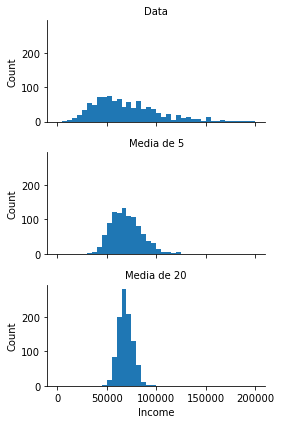

In [11]:
# Graficamos los histogramas
grid = sns.FacetGrid(
    results, 
    col='type', # numero de graficos 
    col_wrap=1, # ordenado en fila(0) o columnas(1)
    height=2,   # ancho de graficos
    aspect=2,   # relacion entra ancho y alto del grafico
) 

# Grafico para cada type
grid.map(plt.hist, 'income', range=[0, 200000], bins=40)
grid.set_axis_labels('Income', 'Count') # titulo de los ejes
grid.set_titles('{col_name}') # titulo de cada grafico
plt.tight_layout();


In [12]:
# Creamos la muestra de los 1000 valores
sample2_data = pd.DataFrame({
    'income':loans_income.sample(1000),
    'type':'Data'
})
sample_data.head()

,income,type
46265,38000,Data
17971,52000,Data
28771,65000,Data
32364,40000,Data
44566,175000,Data


In [19]:
# creamos la muestra de 1000 media para 5 valores
sample2_mean_05 = pd.DataFrame({
    'income':[loans_income.sample(5).median() for _ in range(1000)],
    'type':'Mediana de 5'
})
sample2_mean_05.head()

,income,type
0,60000.0,Mediana de 5
1,50000.0,Mediana de 5
2,60000.0,Mediana de 5
3,71000.0,Mediana de 5
4,43000.0,Mediana de 5


In [20]:
# creamos la muestra de 1000 media para 20 valores
sample2_mean_20 = pd.DataFrame({
    'income':[loans_income.sample(20).median() for _ in range(1000)],
    'type':'Mediana de 20'
})
sample2_mean_20.head()

,income,type
0,77500.0,Mediana de 20
1,61050.0,Mediana de 20
2,71500.0,Mediana de 20
3,69000.0,Mediana de 20
4,67750.0,Mediana de 20


In [22]:
# Agrupamos los resultados en un solo df
results2 = pd.concat([sample2_data, sample2_mean_05, sample2_mean_20])
print(results2.head())

         income  type
47752   64000.0  Data
10534   34129.0  Data
37912   34000.0  Data
20929   50000.0  Data
42434  120000.0  Data


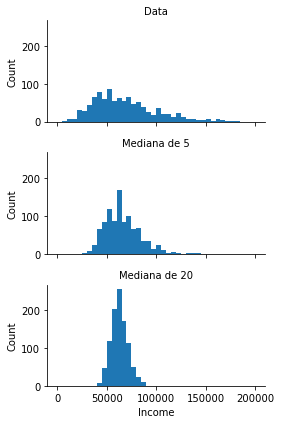

In [23]:
# Graficamos los histogramas
grid = sns.FacetGrid(
    results2, 
    col='type', # numero de graficos 
    col_wrap=1, # ordenado en fila(0) o columnas(1)
    height=2,   # ancho de graficos
    aspect=2,   # relacion entra ancho y alto del grafico
) 

# Grafico para cada type
grid.map(plt.hist, 'income', range=[0, 200000], bins=40)
grid.set_axis_labels('Income', 'Count') # titulo de los ejes
grid.set_titles('{col_name}') # titulo de cada grafico
plt.tight_layout();

Vemos el mismo resultado obtenido al utilizar la media